In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [5]:
df = pd.read_csv('Life Expectancy Data.csv')
df.head(5)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [6]:
df.shape

(2938, 22)

In [7]:
df.describe

<bound method NDFrame.describe of           Country  Year      Status  Life expectancy   Adult Mortality  \
0     Afghanistan  2015  Developing              65.0            263.0   
1     Afghanistan  2014  Developing              59.9            271.0   
2     Afghanistan  2013  Developing              59.9            268.0   
3     Afghanistan  2012  Developing              59.5            272.0   
4     Afghanistan  2011  Developing              59.2            275.0   
...           ...   ...         ...               ...              ...   
2933     Zimbabwe  2004  Developing              44.3            723.0   
2934     Zimbabwe  2003  Developing              44.5            715.0   
2935     Zimbabwe  2002  Developing              44.8             73.0   
2936     Zimbabwe  2001  Developing              45.3            686.0   
2937     Zimbabwe  2000  Developing              46.0            665.0   

      infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [9]:
#changing name to appropriate names
df.rename(columns= {
    'Life expectancy ' : 'life_expect', 
    'Adult Mortality' : 'adult_mort', 
    'infant deaths'   : 'infant_deaths',  
    'percentage expenditure' : 'percent_expend', 
    'Hepatitis B' : 'hepatitis_B', 
    ' BMI' : 'BMI', 
    'under-five deaths' : 'under_five_deaths',
    'Total expenditure' : 'total_expenditure',
    ' HIV/AIDS' : 'HIV/AIDS',
    ' thinness  1-19 years' : 'thinness_1_19',
    ' thinness 5-9 years' : 'thinness_5_9', 
    'Income composition of resources' : 'Income_resources'
 }, inplace=True)

In [10]:
df.head(5)

,Country,Year,Status,life_expect,adult_mort,infant_deaths,Alcohol,percent_expend,hepatitis_B,Measles,...,Polio,total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness_1_19,thinness_5_9,Income_resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [11]:
# categorical index
obj_col = []
for i in df.dtypes.index:
    if df.dtypes[i] == 'object':
        obj_col.append(i)
obj_col


['Country', 'Status']

In [12]:
df.dtypes

Country                object
Year                    int64
Status                 object
life_expect           float64
adult_mort            float64
infant_deaths           int64
Alcohol               float64
percent_expend        float64
hepatitis_B           float64
Measles                 int64
 BMI                  float64
under-five deaths       int64
Polio                 float64
total_expenditure     float64
Diphtheria            float64
HIV/AIDS              float64
GDP                   float64
Population            float64
thinness_1_19         float64
thinness_5_9          float64
Income_resources      float64
Schooling             float64
dtype: object

In [13]:
df.apply(lambda x : len(x.unique()))



Country                193
Year                    16
Status                   2
life_expect            363
adult_mort             426
infant_deaths          209
Alcohol               1077
percent_expend        2328
hepatitis_B             88
Measles                958
 BMI                   609
under-five deaths      252
Polio                   74
total_expenditure      819
Diphtheria              82
HIV/AIDS               200
GDP                   2491
Population            2279
thinness_1_19          201
thinness_5_9           208
Income_resources       626
Schooling              174
dtype: int64

In [14]:
y = df["life_expect"]
df1 = df.drop(["life_expect"], axis = 1)
categorical = df1.select_dtypes(include= "O")
numerical = df1.select_dtypes(exclude= "O")


/home/sahil/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


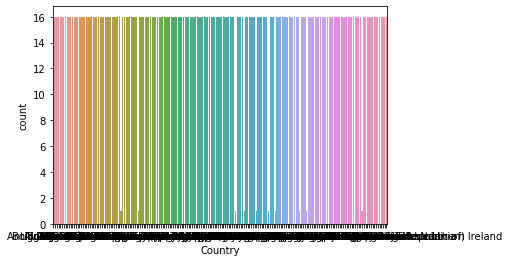

/home/sahil/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


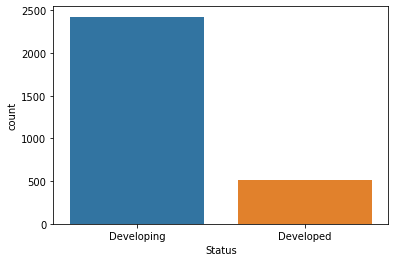

In [15]:
# graphical 
for i in categorical.columns:
    sns.countplot(categorical[i], dodge=True)
    plt.show()

/home/sahil/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


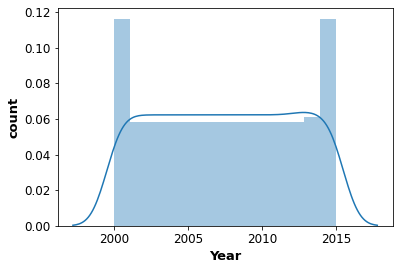

/home/sahil/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


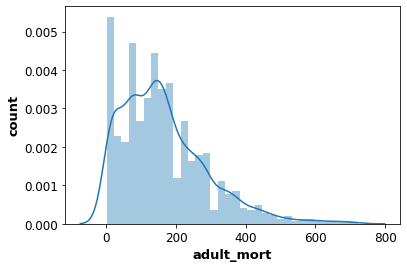

/home/sahil/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


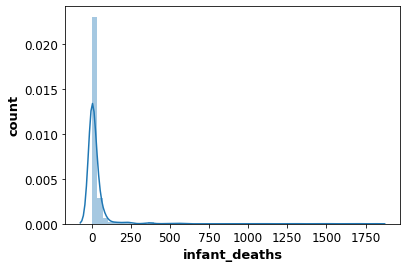

/home/sahil/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


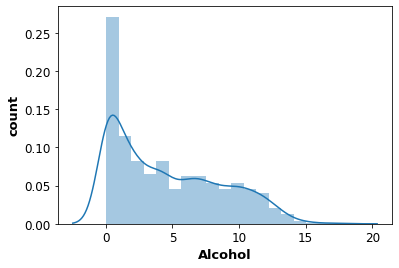

/home/sahil/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


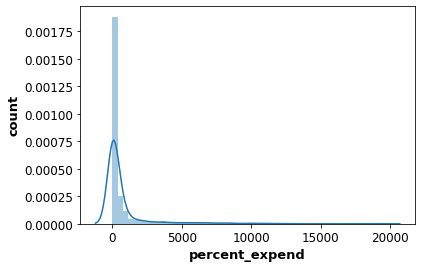

/home/sahil/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


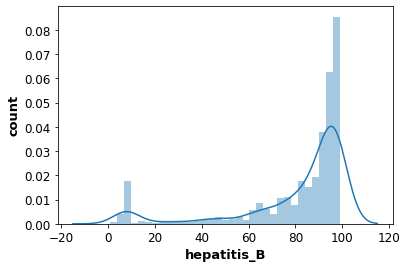

/home/sahil/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


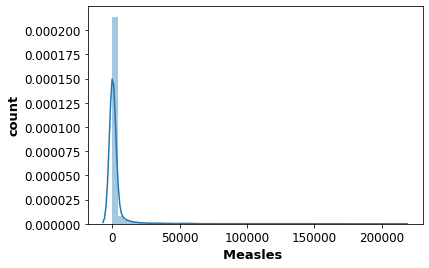

/home/sahil/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


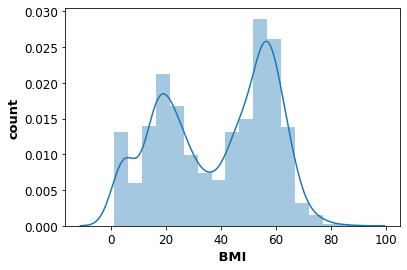

/home/sahil/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


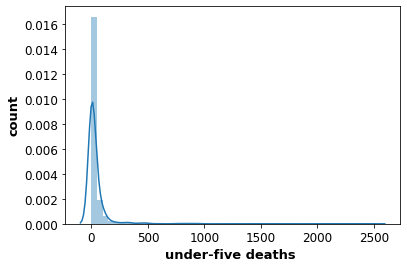

/home/sahil/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


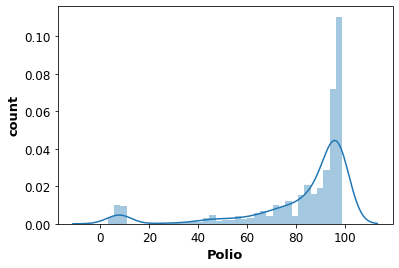

/home/sahil/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


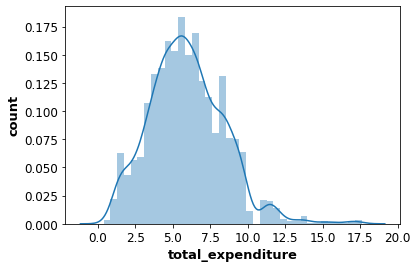

/home/sahil/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


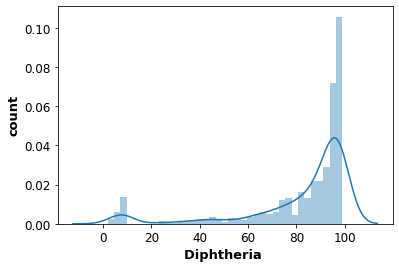

/home/sahil/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


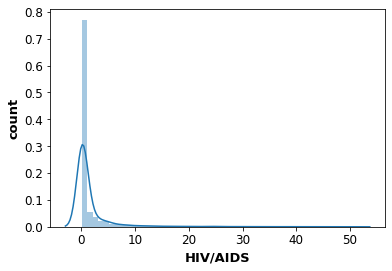

/home/sahil/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


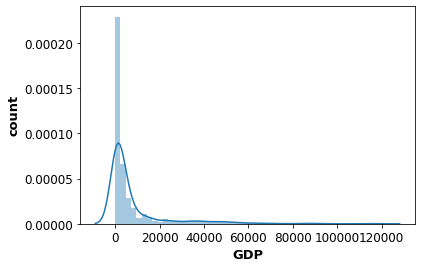

/home/sahil/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


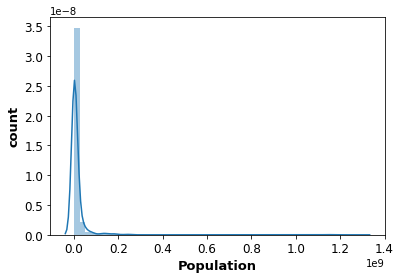

/home/sahil/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


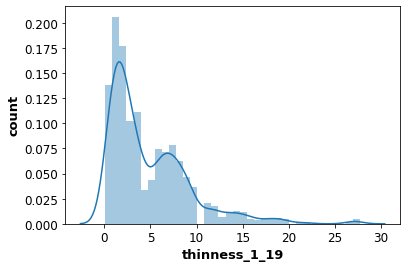

/home/sahil/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


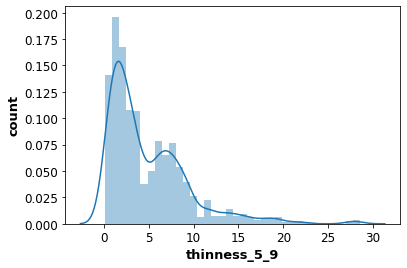

/home/sahil/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


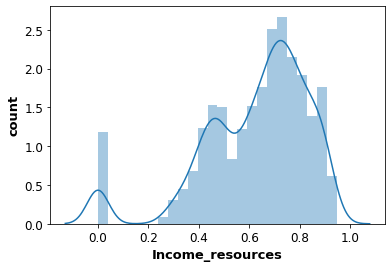

/home/sahil/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


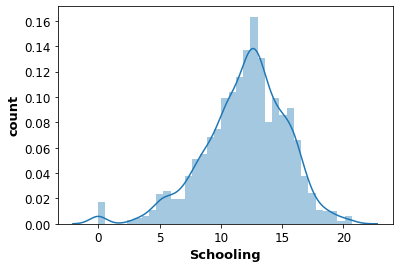

In [16]:
for i in numerical.columns:
    sns.distplot(numerical[i])
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.xlabel(i, fontsize=13, fontweight='bold')
    plt.ylabel("count", fontsize=13, fontweight='bold')
    plt.show()


/home/sahil/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Life Expectancy')

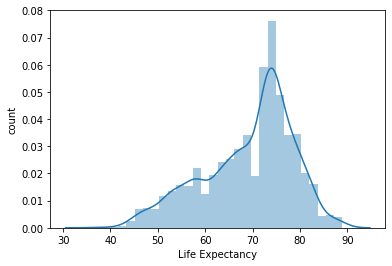

In [17]:
sns.distplot(y)
plt.ylabel("count")
plt.xlabel("Life Expectancy")

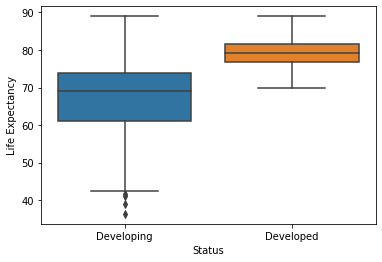

In [18]:
sns.boxplot(x=df1['Status'], y=y)
plt.xlabel("Status")
plt.ylabel("Life Expectancy")
plt.show()

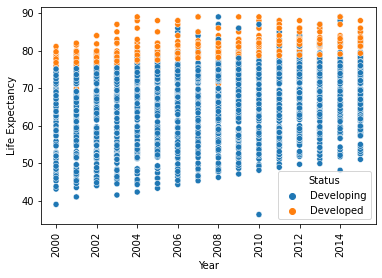

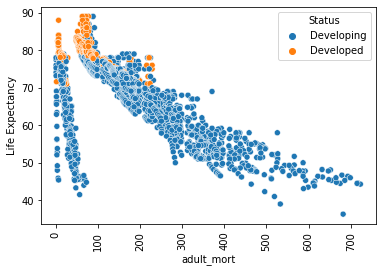

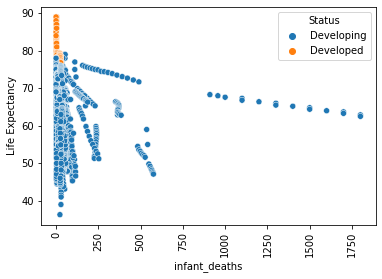

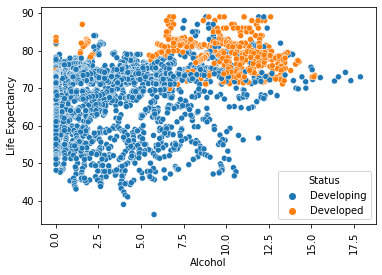

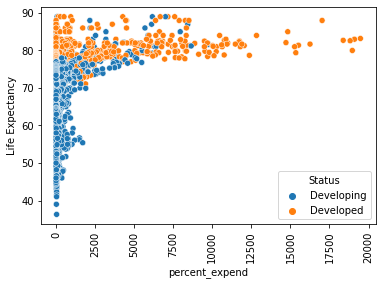

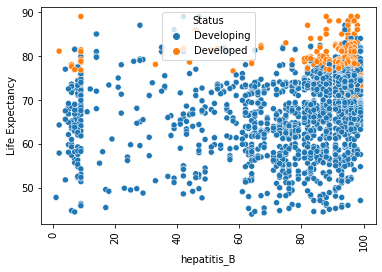

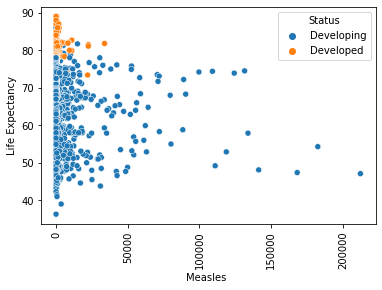

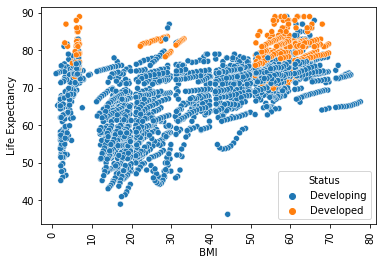

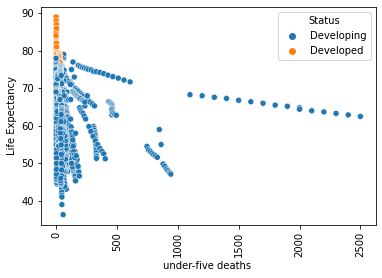

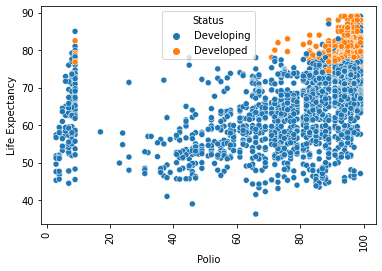

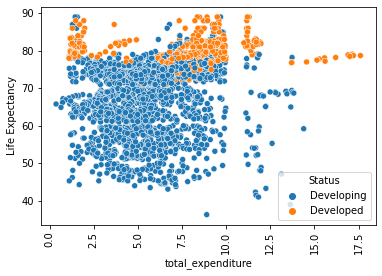

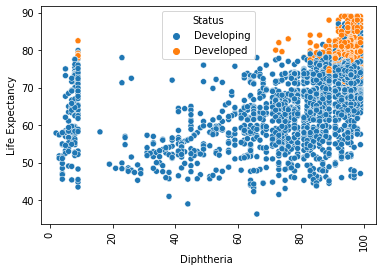

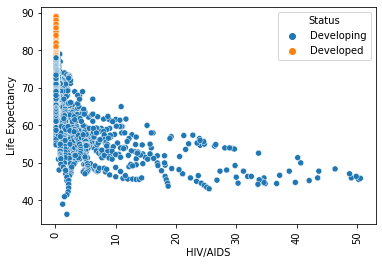

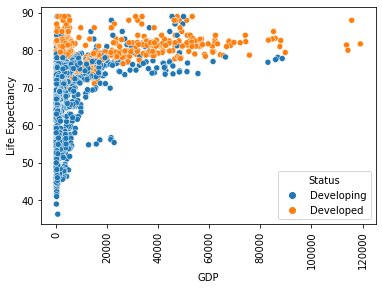

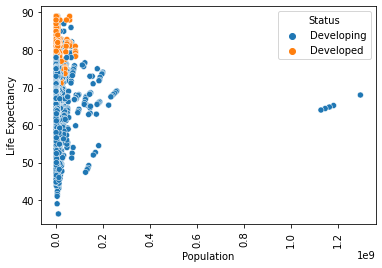

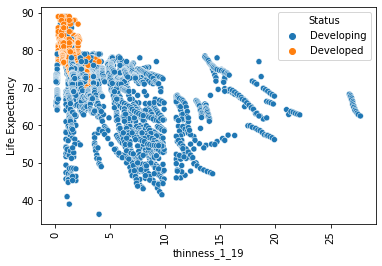

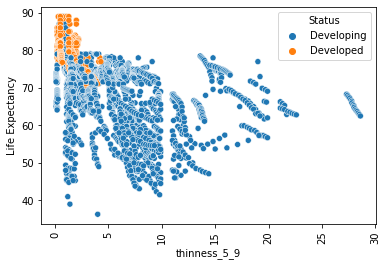

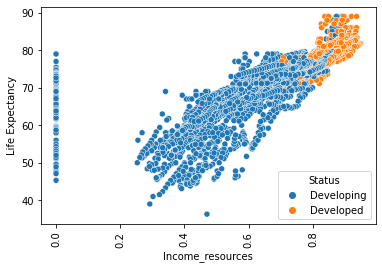

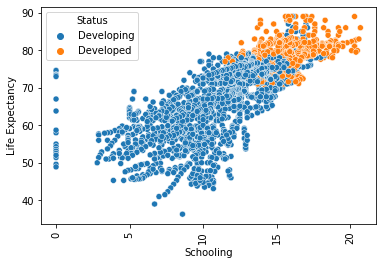

In [19]:
for i in numerical.columns:
    sns.scatterplot(x=numerical[i], y = y, hue=categorical.Status)
    plt.xticks(rotation=90)
    plt.ylabel("Life Expectancy")
    plt.xlabel(i)
    plt.show()


In [20]:
life_numeric_data = df.drop(columns=["Year", "Country", "Status"])

In [21]:
df.isnull().sum()

Country                 0
Year                    0
Status                  0
life_expect            10
adult_mort             10
infant_deaths           0
Alcohol               194
percent_expend          0
hepatitis_B           553
Measles                 0
 BMI                   34
under-five deaths       0
Polio                  19
total_expenditure     226
Diphtheria             19
HIV/AIDS                0
GDP                   448
Population            652
thinness_1_19          34
thinness_5_9           34
Income_resources      167
Schooling             163
dtype: int64

In [22]:
def imputer(df, i, method):
    if method == "mode":
        df[i] = df[i].fillna(df[i].mode()[0])
    elif method == "median":
        df[i] = df[i].fillna(df[i].median())
    else:
        df[i] = df[i].fillna(df[i].mean())

In [23]:
missing_feature = df.columns[df.isnull().any()]
for i in missing_feature:
    imputer(df, i = i, method="mean")

In [24]:
df.isnull().sum()

Country               0
Year                  0
Status                0
life_expect           0
adult_mort            0
infant_deaths         0
Alcohol               0
percent_expend        0
hepatitis_B           0
Measles               0
 BMI                  0
under-five deaths     0
Polio                 0
total_expenditure     0
Diphtheria            0
HIV/AIDS              0
GDP                   0
Population            0
thinness_1_19         0
thinness_5_9          0
Income_resources      0
Schooling             0
dtype: int64

<AxesSubplot:>

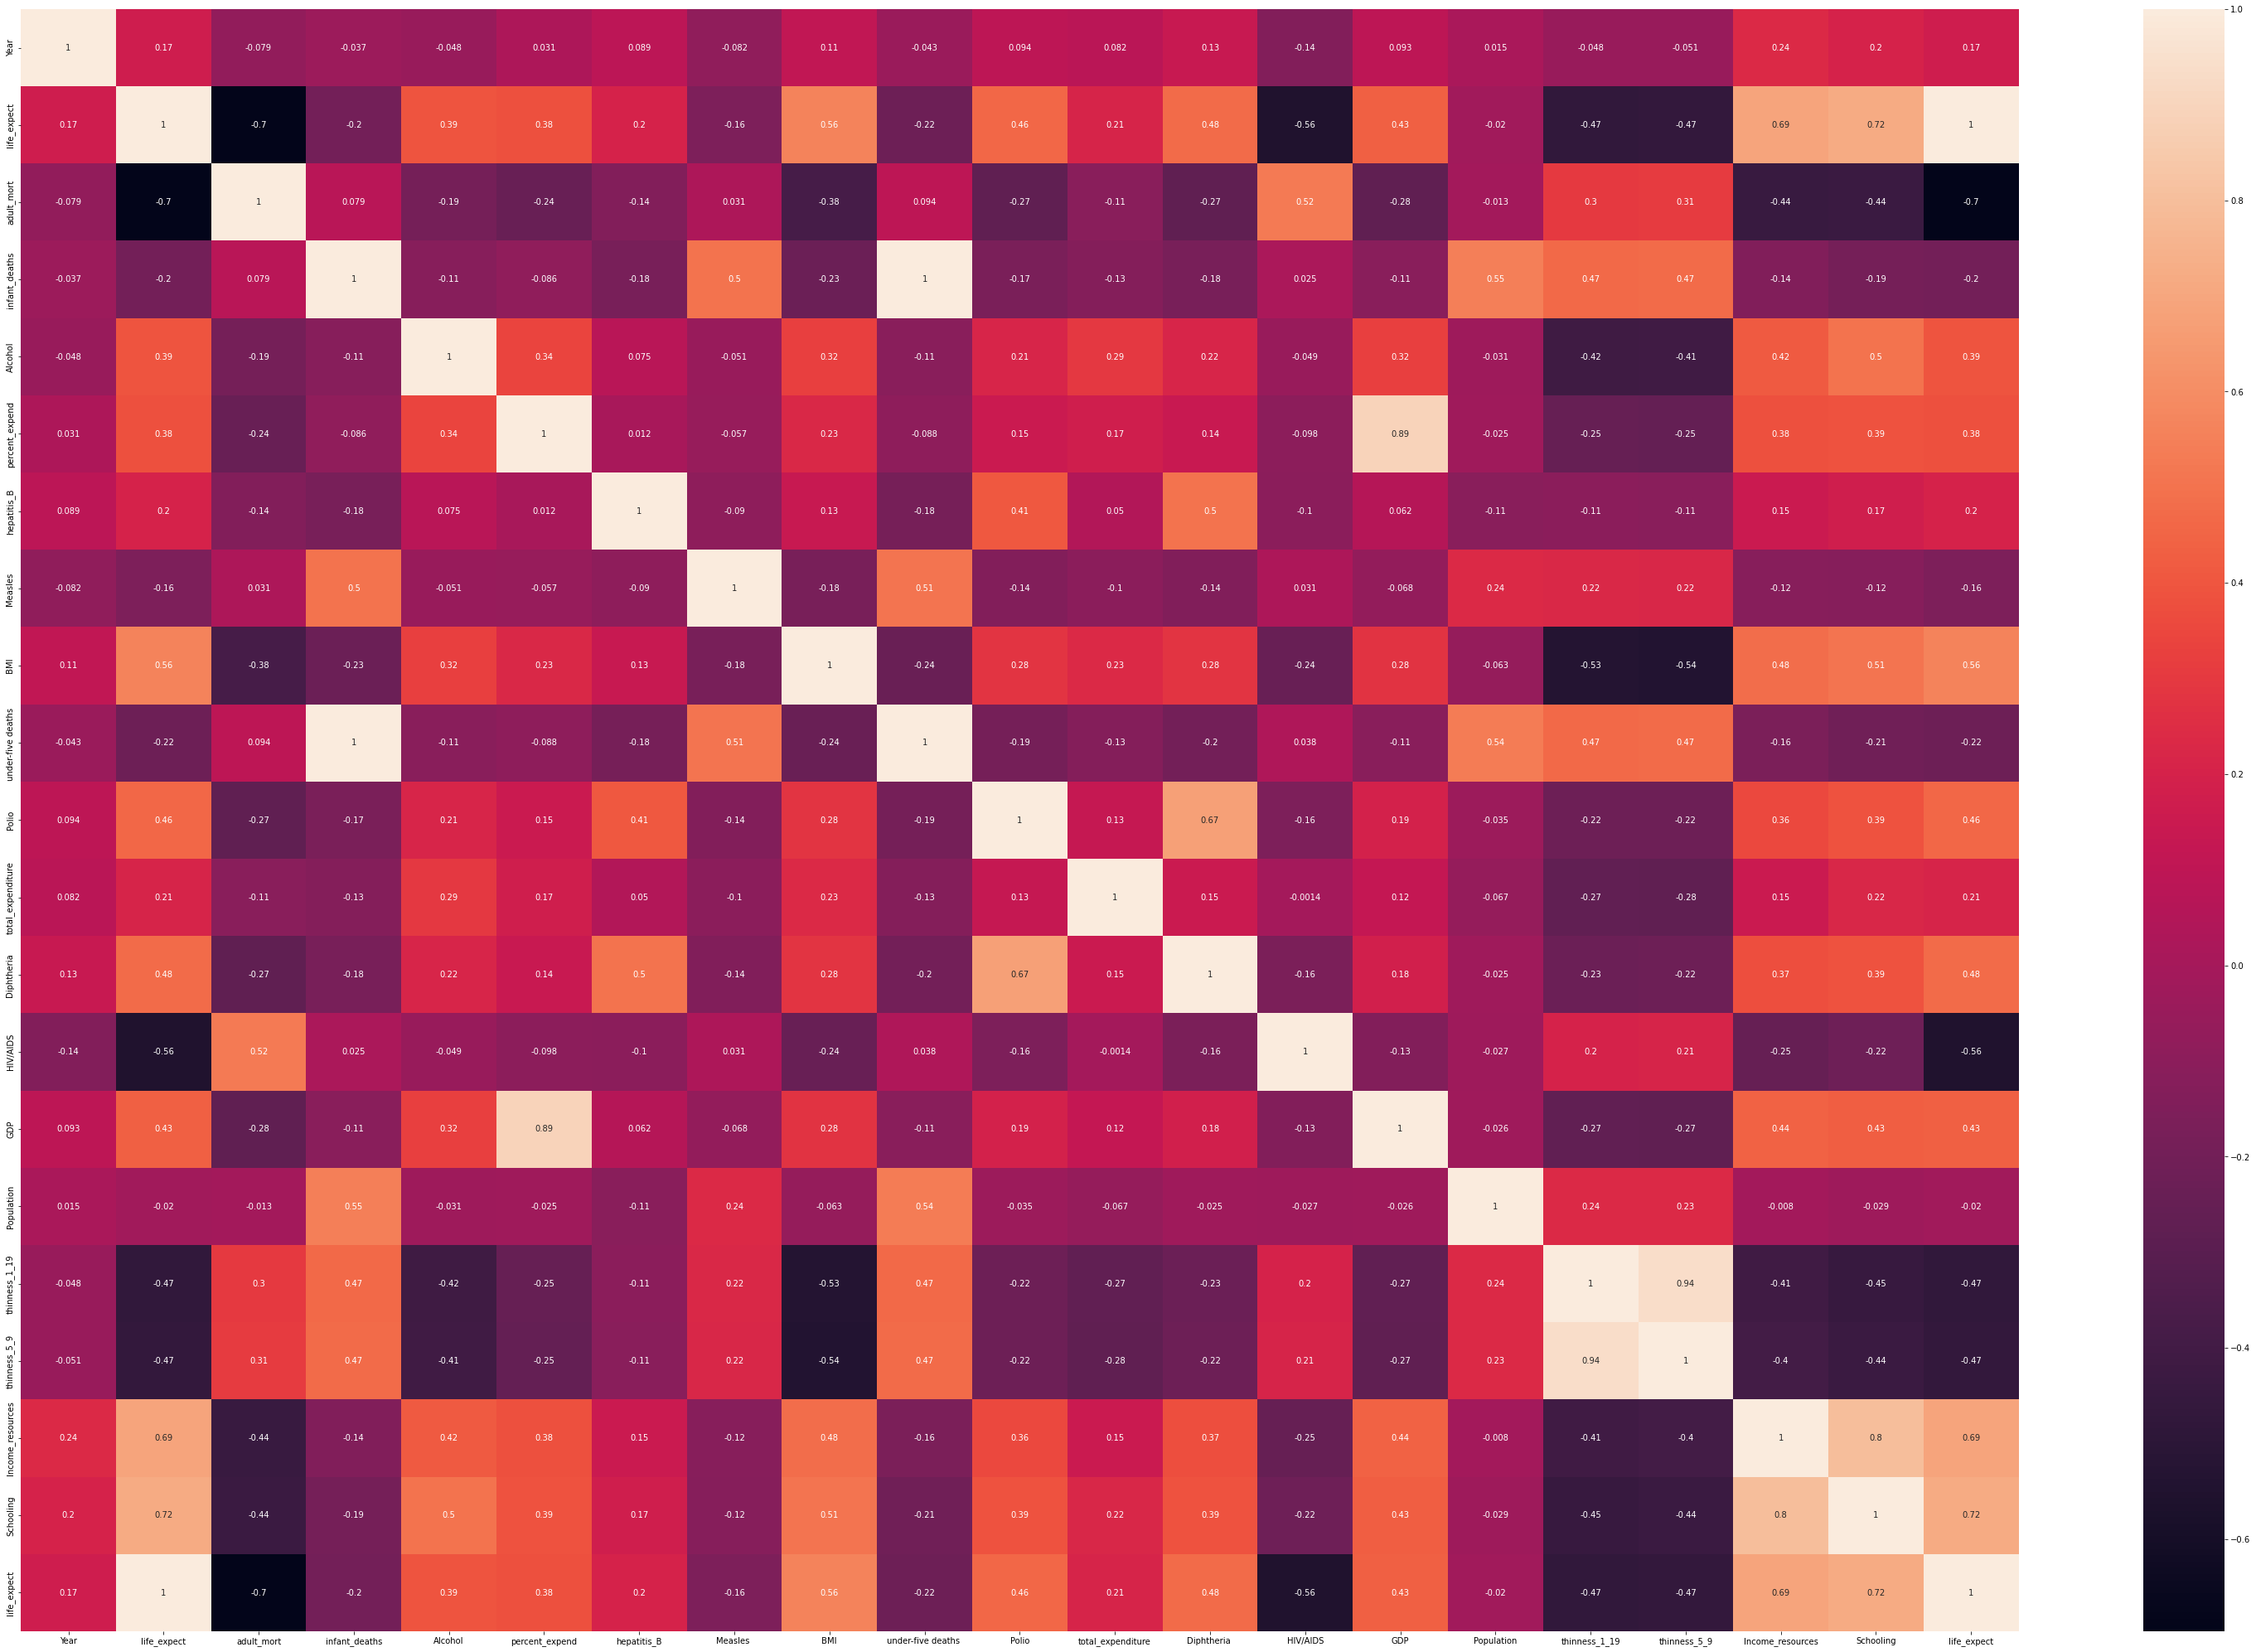

In [25]:
plt.figure(figsize=(54,36))
sns.heatmap(pd.concat([df,y], axis = 1).corr(), annot=True )

In [26]:
from sklearn.preprocessing import LabelEncoder
columns = ["Status"]
for i in columns:
    le = LabelEncoder()
    df[i] = le.fit_transform(df[i])

In [29]:
X = df.drop(['Country', 'Year', 'infant_deaths', 'life_expect'],1)

/tmp/ipykernel_4832/1755317918.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = df.drop(['Country', 'Year', 'infant_deaths', 'life_expect'],1)


In [30]:
X.shape

(2938, 18)

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.25, random_state=42)

In [32]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
 

In [38]:
def predictivve_model():
    algorithms = [SVR(), KNeighborsRegressor(), DecisionTreeRegressor(random_state=0), RandomForestRegressor(random_state=0, n_estimators=100)]
    algorithm_names = ["SVR","KNeighbors Regressor", "Decision-Tree Regressor", "Random-Forest Regressor"]
    Mean_Squared_Error_Training = []
    Mean_Absolute_Error_Training = []
    Accuracy_Training = []
    
    
    Mean_Squared_Error_Testing = []
    Mean_Absolute_Error_Testing = []
    Accuracy_Testing = []

    for i in algorithms:
        model = i
        model.fit(X_train, y_train)
        y_train_predict = model.predict(X_train)
        y_test_predict = model.predict(X_test)
        accuracy_test = model.score(X_test, y_test)
        accuracy_train = model.score(X_train,y_train)

        mse_1 = round(mean_squared_error(y_train, y_train_predict),4)
        mae_1 = round(mean_absolute_error(y_train, y_train_predict),4)

        mse_2 = round(mean_squared_error(y_test, y_test_predict),4)
        mae_2 = round(mean_absolute_error(y_test, y_test_predict),4)

        Mean_Absolute_Error_Testing.append(mae_2)
        Mean_Squared_Error_Testing.append(mse_2)

        Mean_Squared_Error_Training.append(mse_1)
        Mean_Absolute_Error_Training.append(mae_1)

        Accuracy_Testing.append(accuracy_test)
        Accuracy_Training.append(accuracy_train)

    results = pd.DataFrame({"Models":algorithm_names,
                            "Mean Squared Error Training":Mean_Squared_Error_Training , 
                            "Mean Absolute error training": Mean_Absolute_Error_Training , 
                            "Mean Squared error testing":Mean_Squared_Error_Testing ,
                            "Mean Absolute Error testing": Mean_Absolute_Error_Testing,
                            "Accuracy of train set" : Accuracy_Training,
                            "Accuracy of test set" : Accuracy_Testing
    })
    return results

In [39]:
results = predictivve_model()
results

,Models,Mean Squared Error Training,Mean Absolute error training,Mean Squared error testing,Mean Absolute Error testing,Accuracy of train set,Accuracy of test set
0,SVR,12.4784,2.3607,12.0895,2.4044,0.861992,0.865720
1,KNeighbors Regressor,5.4613,1.5619,8.0317,2.0039,0.939600,0.910791
2,Decision-Tree Regressor,0.0000,0.0000,10.2784,2.0838,1.000000,0.885837
3,Random-Forest Regressor,0.5494,0.4628,3.8991,1.3217,0.993924,0.956692
